In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import os




In [3]:
folder_path = 'Brain Tumor Data Set/Brain Tumor'

# List all files in the directory and store them in a list
image_files_tumor = [file for file in os.listdir(folder_path)]

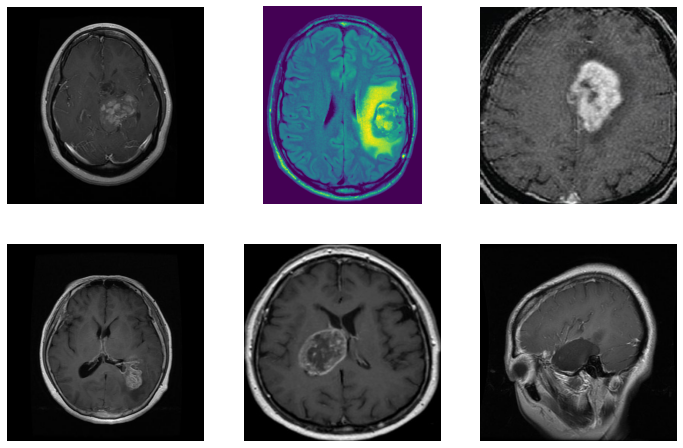

In [4]:
# Determine the number of images to display (up to 6 images)
num_images = min(6, len(image_files_tumor))
num_rows = (num_images - 1) // 3 + 1

# Create a grid of subplots to display tumor images
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

# Loop through and display each tumor image
for i in range(num_images):
    image_path = os.path.join(folder_path, image_files_tumor[i])
    img = mpimg.imread(image_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')  # Hide the axis

# Adjust layout and display the plot
plt.show()

In [5]:
# Define the path to the healthy brain image directory
folder_path = 'Brain Tumor Data Set/Healthy'

# List all files in the directory and store them in a list
image_files_healthy = [file for file in os.listdir(folder_path)]

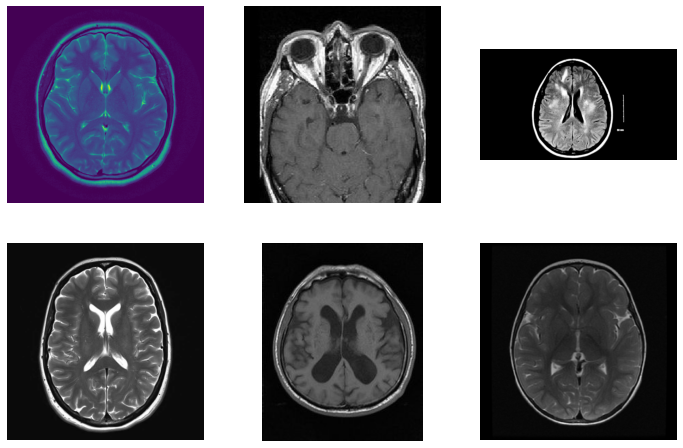

In [6]:
# Determine the number of images to display (up to 6 images)
num_images = min(6, len(image_files_healthy))
num_rows = (num_images - 1) // 3 + 1

# Create a grid of subplots to display healthy brain images
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

# Loop through and display each healthy brain image
for i in range(num_images):
    image_path = os.path.join(folder_path, image_files_healthy[i])
    img = mpimg.imread(image_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')  # Hide the axis

# Adjust layout and display the plot
plt.show()

In [7]:
# Print the number of tumor images
print("Number of Tumor Images in the directory:", len(image_files_tumor))

# Print the number of healthy images
print("Number of Healthy Images in the directory:", len(image_files_healthy))


Number of Tumor Images in the directory: 2513
Number of Healthy Images in the directory: 2087


In [13]:
# img_height, img_width = 224, 224
# batch_size = 512

# # Create an ImageDataGenerator object for data preprocessing
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel values
#     validation_split=0.2  # Reserve 20% of images for validation
# )

# # Load the training dataset using flow_from_directory method
# train_dataset = datagen.flow_from_directory(
#     'Brain Tumor Data Set/',
#     target_size=(img_height, img_width),  # Resize images to 224x224
#     batch_size=batch_size,
#     class_mode='binary',  # Use binary labels (tumor vs. healthy)
#     color_mode='grayscale',  # Load images in grayscale mode
#     interpolation='bilinear',  # Resampling strategy when resizing
#     subset='training'  # Specify that this is the training subset
# )

# # Load the validation dataset using flow_from_directory method
# validation_dataset = datagen.flow_from_directory(
#     'Brain Tumor Data Set/',
#     target_size=(img_height, img_width),  # Resize images to 224x224
#     batch_size=batch_size,
#     class_mode='binary',  # Use binary labels (tumor vs. healthy)
#     color_mode='grayscale',  # Load images in grayscale mode
#     interpolation='bilinear',  # Resampling strategy when resizing
#     subset='validation'  # Specify that this is the validation subset
# )

# # Create a separate ImageDataGenerator object for the test dataset
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255  # Normalize pixel values
# )

# # Load the test dataset using flow_from_directory method
# test_dataset = test_datagen.flow_from_directory(
#     'Brain Tumor Data Set/Test/',  # Directory for test images
#     target_size=(img_height, img_width),  # Resize images to 224x224
#     batch_size=batch_size,
#     class_mode='binary',  # Use binary labels (tumor vs. healthy)
#     color_mode='grayscale',  # Load images in grayscale mode
#     interpolation='bilinear'  # Resampling strategy when resizing
# )
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define the image size and batch size
img_height, img_width = 224, 224
batch_size = 512

# Load all image file paths and labels
data_dir = 'Brain Tumor Data Set'
categories = ['Healthy', 'Brain Tumor']

file_paths = []
labels = []

for category in categories:
    category_dir = os.path.join(data_dir, category)
    for file_name in os.listdir(category_dir):
        file_path = os.path.join(category_dir, file_name)
        file_paths.append(file_path)
        labels.append(category)

# Create a DataFrame
data = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

# Split the data into train, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.4, stratify=data['label'], random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# Create an ImageDataGenerator object for data preprocessing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255  # Normalize pixel values
)

# Create the train, validation, and test datasets using flow_from_dataframe
train_dataset = datagen.flow_from_dataframe(
    train_data,
    x_col='file_path',
    y_col='label',
    target_size=(img_height, img_width),  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='binary',  # Use binary labels (tumor vs. healthy)
    color_mode='grayscale',  # Load images in grayscale mode
    interpolation='bilinear',  # Resampling strategy when resizing
    shuffle=True
)

validation_dataset = datagen.flow_from_dataframe(
    validation_data,
    x_col='file_path',
    y_col='label',
    target_size=(img_height, img_width),  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='binary',  # Use binary labels (tumor vs. healthy)
    color_mode='grayscale',  # Load images in grayscale mode
    interpolation='bilinear',  # Resampling strategy when resizing
    shuffle=False
)

test_dataset = datagen.flow_from_dataframe(
    test_data,
    x_col='file_path',
    y_col='label',
    target_size=(img_height, img_width),  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='binary',  # Use binary labels (tumor vs. healthy)
    color_mode='grayscale',  # Load images in grayscale mode
    interpolation='bilinear',  # Resampling strategy when resizing
    shuffle=False
)




Found 2760 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


In [14]:
# Function to plot training metrics (loss, accuracy, precision, recall)
def plot_metrics(history):
    metrics = ["loss", "accuracy", "Precision", "Recall"]
    plt.figure(figsize=(16, 10))
    
    for n, metric in enumerate(metrics):
        plt.subplot(2, 2, n + 1)
        plt.plot(history.epoch, history.history[metric], label='Train')
        plt.plot(history.epoch, history.history['val_' + metric], linestyle='--', label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.grid(True)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        else:
            plt.ylim([0, 1])
        plt.legend()

In [15]:
# Function to build and train a CNN model for tumor detection
def build_model(metrics, epochs=20):
    tf.keras.backend.clear_session()  # Clear previous session

    # Initialize a Sequential model
    model = tf.keras.models.Sequential()

    # Add Convolutional layers and pooling
    model.add(tfl.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 1)))
    model.add(tfl.MaxPooling2D((2, 2)))
    model.add(tfl.Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(tfl.MaxPooling2D((2, 2)))

    # Flatten the output to feed into Dense layers
    model.add(tfl.Flatten())
    model.add(tfl.Dense(8, activation='relu'))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Dropout(0.3))

    # Output layer with sigmoid activation for binary classification
    model.add(tfl.Dense(1, activation='sigmoid'))

    # Compile the model with binary_crossentropy loss and specified metrics
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

    model.summary()

    # Train the model on training and validation datasets
    history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)

    # Plot training metrics
    plot_metrics(history)

    return model, history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

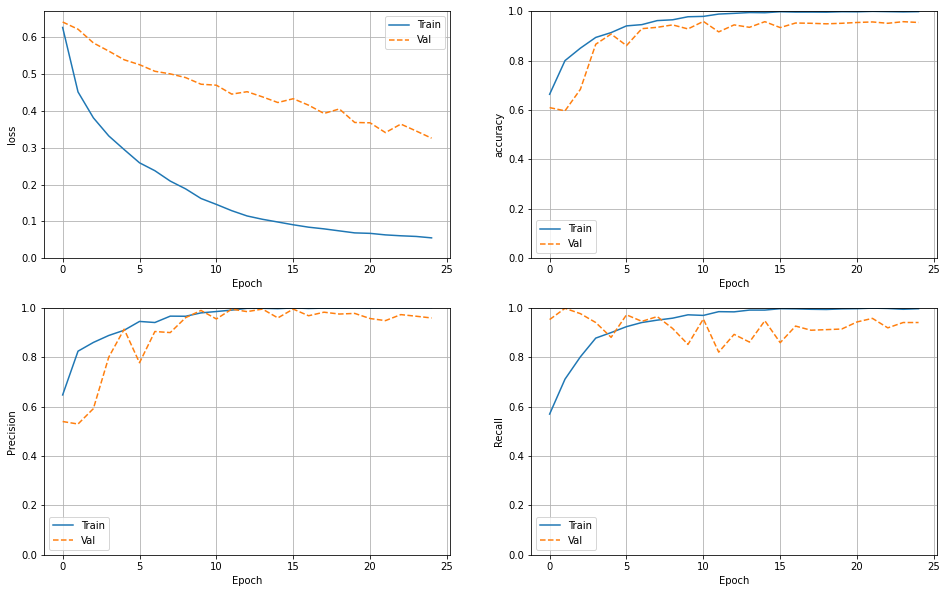

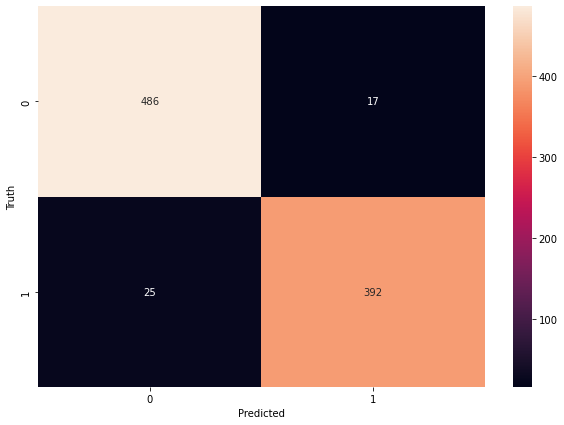

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       503
         1.0       0.96      0.94      0.95       417

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



In [16]:
# Define metrics for model evaluation
metrics = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),
]

# Build and train the model
model, history = build_model(metrics, epochs=25)

# Evaluate the model on the validation dataset for confusion matrix and classification report
steps = validation_dataset.samples // validation_dataset.batch_size
if validation_dataset.samples % validation_dataset.batch_size > 0:
    steps += 1

images_list = []
y_true = []

# Collect true labels from validation dataset
for i, (images, labels) in enumerate(validation_dataset):
    if i >= steps:
        break
    images_list.extend(images)
    y_true.extend(labels)

images_array = np.array(images_list)
y_true = np.array(y_true)

# Predict labels using the trained model
y_pred = model.predict(images_array)
y_pred = (y_pred >= 0.5).astype(int)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred))

In [18]:
results = model.evaluate(test_dataset, verbose=1)

# Assuming the model has been compiled with 'loss' and the specified metrics
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

2/2 [==============================] - 3s 1s/step - loss: 0.3244 - accuracy: 0.9609 - Precision: 0.9775 - Recall: 0.9354
Loss: 0.3243911862373352
Accuracy: 0.960869550704956
Precision: 0.9775000214576721
Recall: 0.9354066848754883
